<a href="https://colab.research.google.com/github/hafsa-masood/Data-Science-Projects/blob/main/Predicting_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#We want to build a statistical model (Linear Regression) to predict the price of a used car based on its different attributes. 

In [ ]:
##Importing relevant libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns 
sns.set()


In [ ]:
## Load raw data

raw_data = pd.read_csv("1.04.+Real-life+example.csv")

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
#Preprocessing

In [ ]:
##Exploring descriptive statistics of the dataset

raw_data.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
###A few observations:
###The maximum number of data points for a column is 4345. 
###The Price and Engine columns have less than 4345 observations. 
###This implies that there are missing values.

###There are 312 different unqiue car models in the dataset. 
###That will be difficult to implement in a linaer regression.
###So, I'll drop that variable. Information about model type can be extrapolated by looking at 
###Brand, Engine, and Year, so there won't be too much information lost.

###The top variable shows which categorical variable appears the most in a column, 
###and the freq variable shows exactly how many times that particular variable appears. 
###In the registration column, "yes" appears 3947 times out of the total 4345. 
###That's 91% of the data in that column. It doesn't seem like it will be good at predicting anything.

In [ ]:
##Cleaning the data

In [ ]:
##Dropping unwanted variables

In [ ]:
data = raw_data.drop(['Model'], axis=1)

#Axis= 1 refers to a columns in a dataframe. Axis=0 refers to rows in a dataframe. 

data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
##Dealing with missing values

In [ ]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [ ]:
#As expected, Price and Engine have missing values. 
#Since there are so few missing values compared to total values (approx ~3% of the data),
#I will drop them from the dataframe.
#The general rule of thumb is if you're removing <5% of the observations, you can freely remove all that have missing values.

In [ ]:
data_no_mv = data.dropna(axis=0)

In [ ]:
#Check for duplicate observations

data_no_mv.duplicated().sum()

66

In [ ]:
data_no_mv.loc[data_no_mv.duplicated(),:]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
348,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016
602,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016
1160,BMW,47000.0,other,5,2.00,Petrol,yes,2014
1217,BMW,75555.0,sedan,30,4.40,Petrol,yes,2014
1225,Volkswagen,11990.0,van,231,2.50,Diesel,yes,2002
...,...,...,...,...,...,...,...,...
4204,Mercedes-Benz,20500.0,sedan,173,1.80,Gas,yes,2011
4274,Mercedes-Benz,109999.0,crossover,0,2.98,Diesel,yes,2016
4277,Mercedes-Benz,111999.0,crossover,0,3.00,Diesel,yes,2016
4311,Renault,10500.0,vagon,185,1.50,Diesel,yes,2011


In [ ]:
data_no_mv_dup = data_no_mv.drop_duplicates()

data_no_mv_dup

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [ ]:
##As we can see from the number of rows, the 66 duplicated values have been removed

In [ ]:
##Exploring the probability distribution functions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


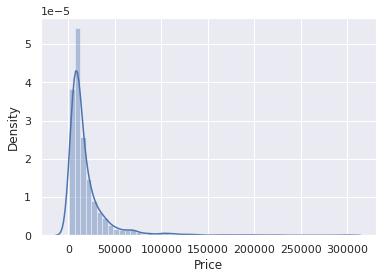

In [ ]:
sns.distplot(data_no_mv_dup['Price'])

In [ ]:
#In an ideal world, the distribution plot would be normally distributed, 
#but as we can see here, it's distributed exponentially.
#We can also see that there are some outliers which are skewing the distribution. 
#In order to get the price values closer to being normally distributed, I will remove the top 1% of observations.


In [ ]:
##Dealing with outliers
#I want values at the 99th percentile and keep data below it. 
q1 = data_no_mv_dup['Price'].quantile(0.99)
data_1 = data_no_mv_dup[data_no_mv_dup['Price']<q1]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3918,3918.000000,3918,3918.000000,3918.000000,3918,3918,3918.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,864,NaN,1502,NaN,NaN,1812,3547,NaN
mean,NaN,17293.577836,NaN,166.554109,2.744513,NaN,NaN,2006.188106
std,NaN,18063.109785,NaN,102.497705,4.995953,NaN,NaN,6.659415
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11200.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20844.362500,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


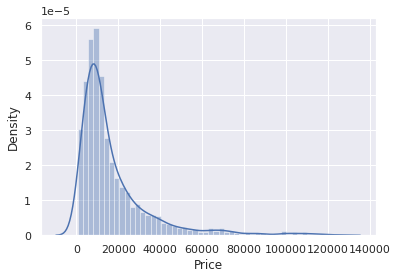

In [ ]:
sns.distplot(data_1['Price'])

In [ ]:
#As we can see that after removing the outliers, the distribution looks alot better than before. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


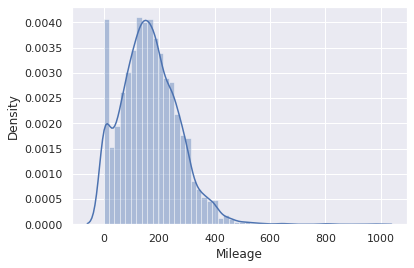

In [ ]:
sns.distplot(data_1['Mileage'])

In [ ]:
#We can see that Mileage has the same issue, so we can treat it in the same manner as we did Price.

In [ ]:
q2 = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q2]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3878,3878.000000,3878,3878.000000,3878.000000,3878,3878,3878.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,851,NaN,1485,NaN,NaN,1784,3510,NaN
mean,NaN,17386.381630,NaN,162.874678,2.748427,NaN,NaN,2006.285714
std,NaN,18090.491056,NaN,95.672453,5.020926,NaN,NaN,6.582612
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,95.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11300.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20900.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


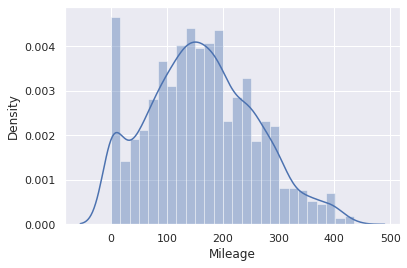

In [ ]:
sns.distplot(data_2['Mileage'])

In [ ]:
#Looks much better!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


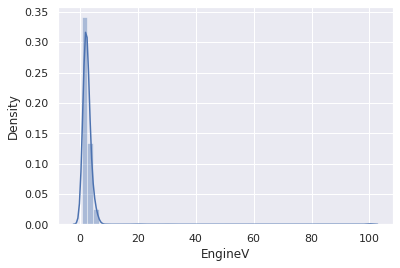

In [ ]:
sns.distplot(data_no_mv_dup['EngineV'])

In [ ]:
#As we can see, the distribution for EngineV is quite strange. 
#When looking at the descriptive stats, we can see that majority of the engine sizes are below 3, 
#and the maximum is 99.99
#What kind of car holds an engine with a volume of 99.99?! 
#These have to be incorrect entries. Googling for car engine volumes, 
#we can see on the Wikipedia page that engine volume should fall between 0.6 and 6.5.]
#https://en.wikipedia.org/wiki/Engine_displacement 

In [ ]:
data_3 = data_2[data_2['EngineV']<6.5]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


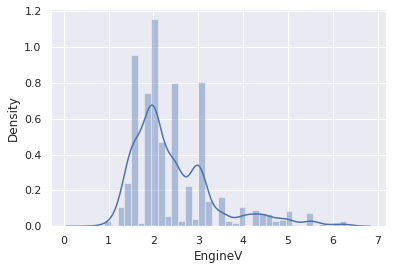

In [ ]:
sns.distplot(data_3['EngineV'])

In [ ]:
#Looks so much better!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


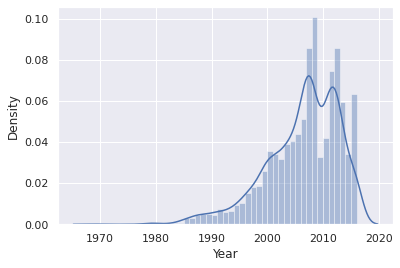

In [ ]:
#Now let's look at year:

sns.distplot(data_3['Year'])

In [ ]:
#We can see the opposite problem when it comes to year. We see that majority of cars are newer, 
#But we do have a few vintage cars in the dataset. 
#This time, I will keep all observations that are higher than the first percentile. 

In [ ]:
q3 = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q3]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


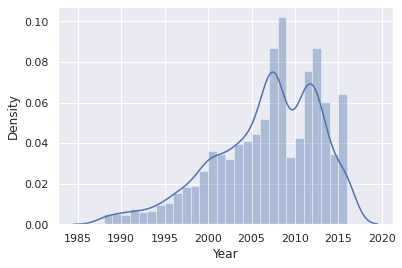

In [ ]:
sns.distplot(data_4['Year'])

In [ ]:
#Now that the data is cleaned, I'll set it to a new variable, and reset the index. 

data_cleaned = data_4.reset_index(drop=True)

In [ ]:
data_cleaned.describe(include='all')

#After looking at the descriptive stats for the cleaned data, all of range of values seem more reasonable than what we originally started with. 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3801,3801.000000,3801,3801.000000,3801.000000,3801,3801,3801.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,832,NaN,1441,NaN,NaN,1766,3439,NaN
mean,NaN,17640.389926,NaN,161.945014,2.446112,NaN,NaN,2006.609050
std,NaN,18162.432143,NaN,95.277036,0.947914,NaN,NaN,6.085726
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7150.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,228.000000,3.000000,NaN,NaN,2011.000000


In [ ]:
#Checking OLS assumptions 

In [ ]:
#First we have to check for linearity in our data. (Does the data actually follow a linear trend)

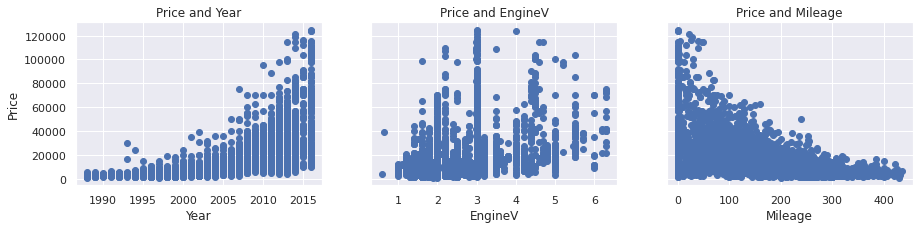

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax2.set_xlabel('EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
ax3.set_xlabel('Mileage')

plt.show()

In [ ]:
#We can see that we do not see a linear relationship between the different variables and price, 
#and follow an expontential trend. Once again, this is a sign of skewed data, that isn't normally distributed.
#In cases like these, we can use a log transformation. 
#We will take the log of price, an then make the plots again.

In [ ]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3796,Renault,2100.0,vagon,237,1.9,Diesel,no,2001,7.649693
3797,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3798,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3799,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556


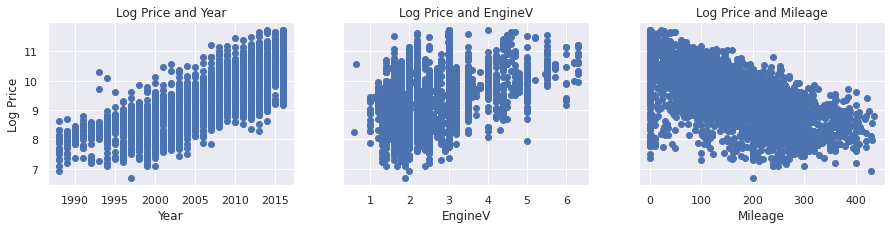

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Log Price')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax2.set_xlabel('EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
ax3.set_xlabel('Mileage')

plt.show()

In [ ]:
#Now the data looks like it's following a linear trend! 
#We can drop the original price column from the dataframe and keep the log price one. 

In [ ]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [ ]:
#Checking for multicollinearity

#Logically, we can expect Year and Mileage to be correlated. 
#Generally, the newer the car, the lower its mileage.

#We can check for multicollinearity with VIF(Variance Inflation Factor)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [ ]:
vif

,VIF,features
0,3.862977,Mileage
1,10.348071,Year
2,7.660330,EngineV


In [ ]:
#When vif = 1, that means there is no multicollinearity
#We see that Year has a high value, so we should remove it. 

In [ ]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

In [ ]:
#Create dummy variables

#In order to use categorical variables in a regression, we have to assign dummy variables to them. 

In [ ]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [ ]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
#Rearrange the columns in the dataframe

data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [ ]:

data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
#Linear Regression Model


In [ ]:
#Declare Inputs and Targets

targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [ ]:
#scale the data

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [ ]:
inputs_scaled = scaler.transform(inputs) 

In [ ]:
##Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat = reg.predict(x_train)

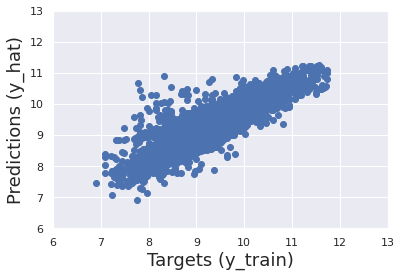

In [ ]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
#In an ideal world, we would want the y_train values to match up exactly with the y_hat values,
#Even though our plot may not follow this, we still do see a linear relationship with the values, 
#matching up closely around the 45 degree angle

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

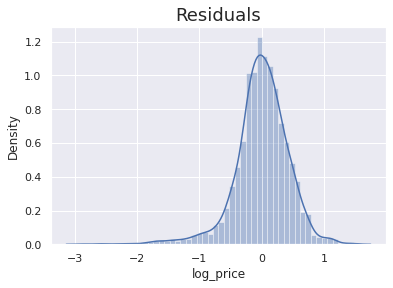

In [ ]:
#Making a residual plot. We can check the differences between the targets and predictions. 
#This is basically the estimates of the errors.  

sns.distplot(y_train - y_hat)
plt.title("Residuals", size=18)

In [ ]:
#We do see that the residuals follow a relatively normal distribution, with a mean of zero. 
#The only cause for concern is the longer tail on the left side of the distribution. 
#That means there are observations where the error is much lower than the mean error. 
#That means that there are some cars that have a lower price than what was predicted by our regression. 
#(A much higher price is predicted than observed).
#Looking at the right side of the distribution, and observing the fact that there is no long tail on this side, 
#means that the model rarely underestimate the targets. 

In [ ]:
# calculate R^2

reg.score(x_train, y_train)

0.7477402838858502

In [ ]:
#Finding the weights and biases

reg.intercept_

9.403881388004978

In [ ]:
reg.coef_

array([-0.45631422,  0.20808205,  0.00630999, -0.0026039 , -0.14246701,
       -0.19139893, -0.06346172, -0.09806177, -0.14303402, -0.09915699,
       -0.19900301, -0.13036366, -0.15821981, -0.11950969, -0.0267944 ,
       -0.1420562 ,  0.3132769 ])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.456314
1,EngineV,0.208082
2,Brand_BMW,0.006310
3,Brand_Mercedes-Benz,-0.002604
4,Brand_Mitsubishi,-0.142467
5,Brand_Renault,-0.191399
6,Brand_Toyota,-0.063462
7,Brand_Volkswagen,-0.098062
8,Body_hatch,-0.143034
9,Body_other,-0.099157


In [ ]:
#Testing the model

In [ ]:
y_hat_test = reg.predict(x_test)

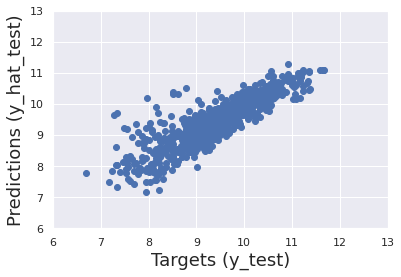

In [ ]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
#Observing this graph, we can see that the hight value ys are more concentrated around the 45 degree angle line
#This means the model is good at predicting higher prices
#On the other hand, we see that for lower values, they are alot more scattered for lower prices. 

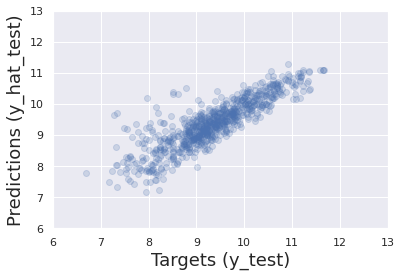

In [ ]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
#We can create partial heat map that shows where the data points are most concentrated. 
#The paler the color, the lesser concentration of data points, the more opaque the higher concentration. 
#This shows that most of the points are near the 45 degree line!


In [ ]:
#Checking the performance of the model

In [ ]:
#Currently the prices are in log prices format. In order to get to the original prices, we have to take the exponentials of the log prices. 
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=(['Prediction']))

df_performance.head()

,Prediction
0,5962.258942
1,6969.193087
2,8502.024068
3,22856.393782
4,29158.895281


In [ ]:
df_performance['Target'] = np.exp(y_test)
df_performance.head()

,Prediction,Target
0,5962.258942,NaN
1,6969.193087,7900.0
2,8502.024068,NaN
3,22856.393782,NaN
4,29158.895281,NaN


In [ ]:
#It seems like there are quite a few missing values. 
#This is because pandas is trying to join the columns on index, 
#so we will have to reset them. 

y_test = y_test.reset_index(drop=True)
y_test.head()


0     9.071078
1     9.314700
2     8.942461
3     9.738023
4    10.252382
Name: log_price, dtype: float64

In [ ]:
df_performance['Target'] = np.exp(y_test)
df_performance.head()

,Prediction,Target
0,5962.258942,8700.0
1,6969.193087,11100.0
2,8502.024068,7650.0
3,22856.393782,16950.0
4,29158.895281,28350.0


In [ ]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']

In [ ]:
df_performance['Difference%'] = np.absolute(df_performance['Residual']/df_performance['Target']*100)

df_performance

,Prediction,Target,Residual,Difference%
0,5962.258942,8700.0,2737.741058,31.468288
1,6969.193087,11100.0,4130.806913,37.214477
2,8502.024068,7650.0,-852.024068,11.137570
3,22856.393782,16950.0,-5906.393782,34.845981
4,29158.895281,28350.0,-808.895281,2.853246
...,...,...,...,...
756,11482.923914,8999.0,-2483.923914,27.602222
757,11133.166843,12900.0,1766.833157,13.696381
758,40297.016321,44000.0,3702.983679,8.415872
759,9180.268983,4200.0,-4980.268983,118.577833


In [ ]:
#We can once again look at the descriptive statistics of the dataframe to see how well the model performed. 


In [ ]:
df_performance.describe()

,Prediction,Target,Residual,Difference%
count,761.000000,761.000000,761.000000,761.000000
mean,15748.670107,16800.923995,1052.253888,40.849453
std,12626.391133,17039.034385,8592.928973,80.668239
min,1281.883237,800.000000,-29898.168521,0.008920
25%,7294.625826,6800.000000,-2422.371977,10.476538
50%,11746.271914,10900.000000,171.032199,23.989549
75%,20091.856142,20300.000000,2566.084236,41.181438
max,78082.126430,115800.000000,52587.581118,969.099576


In [ ]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_performance.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
672,41896.26,41900.00,3.74,0.01
537,9002.69,9000.00,-2.69,0.03
665,17013.38,16999.00,-14.38,0.08
256,9814.98,9800.00,-14.98,0.15
238,7513.72,7500.00,-13.72,0.18
242,9476.97,9500.00,23.03,0.24
46,23257.56,23200.00,-57.56,0.25
365,13565.65,13600.00,34.35,0.25
200,14949.39,15000.00,50.61,0.34
244,8866.42,8900.00,33.58,0.38


In [ ]:
#Manually exploring this dataframe, we can see which observations we obtained good predictions for. 
#And for which we are very far off. 
#Looking at the bottom most rows, we see that the target prices of the cars are quite low. 
#Looking at the negative residuals, we see that the model predicted a higher price for these cars. 
#We could be missing an important factor that causes the prices of these used cars to be lower.
#It could be the model of the car, which we removed earlier, or it could be other factors like 
#condition of the car (i.e. damaged)